<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Importing-dataset" data-toc-modified-id="Importing-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing dataset</a></span></li><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Development</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Parameter-Tuning-Approach" data-toc-modified-id="Parameter-Tuning-Approach-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parameter Tuning Approach</a></span></li><li><span><a href="#Parameter-Values" data-toc-modified-id="Parameter-Values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Parameter Values</a></span><ul class="toc-item"><li><span><a href="#Iteration-1" data-toc-modified-id="Iteration-1-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Iteration 1</a></span></li></ul></li><li><span><a href="#Tree-Specific-parameter" data-toc-modified-id="Tree-Specific-parameter-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tree Specific parameter</a></span><ul class="toc-item"><li><span><a href="#Iteration-2" data-toc-modified-id="Iteration-2-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Iteration 2</a></span></li><li><span><a href="#Iteration-3" data-toc-modified-id="Iteration-3-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Iteration 3</a></span></li><li><span><a href="#Iteration-4" data-toc-modified-id="Iteration-4-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Iteration 4</a></span></li><li><span><a href="#Iteration-5" data-toc-modified-id="Iteration-5-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Iteration 5</a></span></li></ul></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Model 4</a></span></li><li><span><a href="#Model-5" data-toc-modified-id="Model-5-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Model 5</a></span></li></ul></li></ul></div>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=12,4
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Importing dataset

In [2]:
train_df=pd.read_csv('train_modified.csv',encoding='utf=8')

In [3]:
print(train_df.shape)
train_df.head()

(87020, 51)


,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Model Development

In [4]:
target='Disbursed'
id_col='ID'

In [5]:
def model_fit(alg,dtrain,predictors,target):
    #fit model
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict using model
    dtrain_predictions=alg.predict(dtrain[predictors])
    dtrain_pred_prob=alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross validation
    cv_score=cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=5,scoring='roc_auc')
    
    #print report
    print("Accuracy: ",metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
    print("AUC score: ",metrics.roc_auc_score(dtrain[target],dtrain_pred_prob))
    print("CV score: Mean-", np.mean(cv_score),
          " Std-", np.std(cv_score),
          " Min-", np.min(cv_score), 
          " Max-",np.max(cv_score))
    
    feat_imp=pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar',title='Feature Importance')
    plt.ylabel('Feature Importance Score')

### Baseline model

Accuracy:  0.985601011262
AUC score:  0.862263677637
CV score: Mean- 0.831858850757  Std- 0.00875696918727  Min- 0.820805007717  Max- 0.843855820431


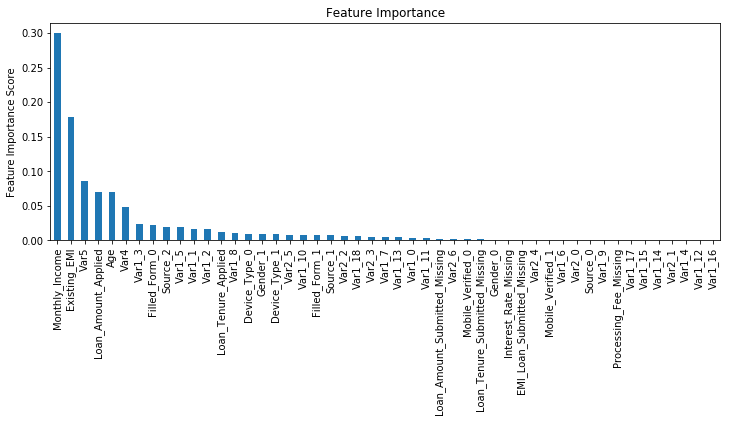

In [6]:
predictors=[x for x in train_df.columns if x not in [target,id_col]]
gbm0=GradientBoostingClassifier(random_state=10)
model_fit(gbm0,train_df,predictors,target)

### Parameter Tuning Approach
a) Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
<br>
b) Determine the optimum number of trees for this learning rate. This should range around 40-70. Choose a value on which your system work  fast
<br>
c) Tune tree-specific parameters for decided learning rate and number of trees
<br>
d) Lower the learning rate and increase the estimators proportionally to get more robust models


### Parameter Values
a) min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we'll take a small value from the range
<br>
b) min_samples_leaf = 50 : Can be selected based on intuition. Used for preventing overfitting and again a small value because of imbalanced classes
<br>
c) max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here
<br>
d) max_features = 'sqrt' : Its a general thumb-rule to start with square root
<br>
e) subsample = 0.8 : This is a commonly used used start value

#### Iteration 1

In [7]:
predictors=[x for x in train_df.columns if x not in [target,id_col]]
param_test1={'n_estimators':list(range(20,81,10))}
gsearch1=GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,
                                                           min_samples_split=500,
                                                           min_samples_leaf=50,
                                                           max_depth=8,
                                                           max_features='sqrt',
                                                           subsample=0.8,
                                                           random_state=10),
                     param_grid=param_test1,
                      scoring='roc_auc',
                      n_jobs=4,
                      iid=False,
                      cv=5)
gsearch1.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [8]:
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

([mean: 0.83337, std: 0.00991, params: {'n_estimators': 20},
  mean: 0.83697, std: 0.00994, params: {'n_estimators': 30},
  mean: 0.83832, std: 0.01050, params: {'n_estimators': 40},
  mean: 0.83867, std: 0.01081, params: {'n_estimators': 50},
  mean: 0.83939, std: 0.01077, params: {'n_estimators': 60},
  mean: 0.83891, std: 0.01044, params: {'n_estimators': 70},
  mean: 0.83807, std: 0.01093, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8393880266861308)

a) If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
<br>
b) If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

### Tree Specific parameter
a) Tune max_depth and num_samples_split
<br>
b) Tune min_samples_leaf
<br>
c) Tune max_features

#### Iteration 2

In [9]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=60,
                                                               max_features='sqrt', 
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)
gsearch2.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 7, 9, 11, 13, 15], 'min_samples_split': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [10]:
gsearch2.grid_scores_,gsearch2.best_params_,gsearch2.best_score_

([mean: 0.83297, std: 0.01226, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83251, std: 0.01054, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83386, std: 0.01415, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83379, std: 0.01169, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83339, std: 0.01266, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83365, std: 0.00787, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83663, std: 0.00991, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83480, std: 0.00828, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83786, std: 0.01067, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.83769, std: 0.01060, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.83581, std: 0.01003, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.83729, std: 0.00959, params: {'max_depth': 9, 'min_samples_split': 400},
  

#### Iteration 3

In [11]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=60,
                                                               max_depth=9,
                                                               max_features='sqrt',
                                                               subsample=0.8, 
                                                               random_state=10), 
                        param_grid = param_test3,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)
gsearch3.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [12]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83821, std: 0.01092, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83876, std: 0.01262, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83552, std: 0.01024, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83683, std: 0.01429, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83958, std: 0.01233, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83852, std: 0.01097, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83839, std: 0.00896, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83757, std: 0.01274, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83757, std: 0.01074, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.83779, std: 0.01199, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.83764, std: 0.01366, params: {'min_samples_leaf': 40, 'min_samples_spl

Accuracy:  0.985371179039
AUC score:  0.896452827653
CV score: Mean- 0.839759762884  Std- 0.00993601709256  Min- 0.825547361802  Max- 0.852767177719


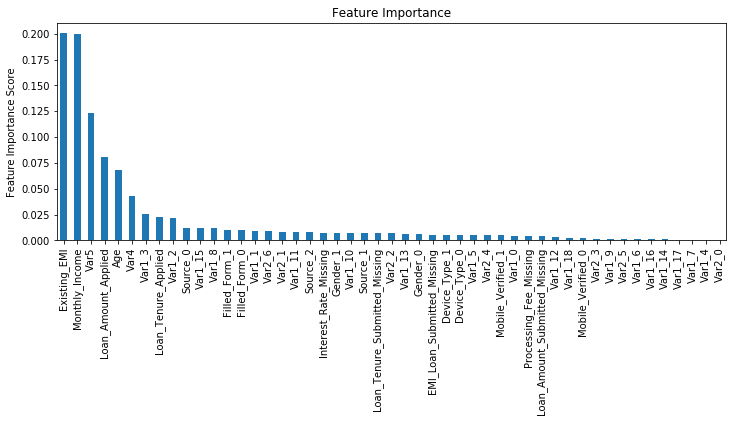

In [13]:
model_fit(gsearch3.best_estimator_, train_df, predictors,target)

#### Iteration 4

In [14]:
param_test4 = {'max_features':list(range(7,20,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=60,
                                                               max_depth=9, 
                                                               min_samples_split=1200,
                                                               min_samples_leaf=60, 
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test4,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch4.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=1200,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': [7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [15]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83976, std: 0.00994, params: {'max_features': 7},
  mean: 0.83648, std: 0.00988, params: {'max_features': 9},
  mean: 0.83919, std: 0.01042, params: {'max_features': 11},
  mean: 0.83738, std: 0.01017, params: {'max_features': 13},
  mean: 0.83898, std: 0.01101, params: {'max_features': 15},
  mean: 0.83437, std: 0.00965, params: {'max_features': 17},
  mean: 0.83524, std: 0.01018, params: {'max_features': 19}],
 {'max_features': 7},
 0.839759762884295)

#### Iteration 5

In [16]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=60,
                                                               max_depth=9,
                                                               min_samples_split=1200,
                                                               min_samples_leaf=60, 
                                                               subsample=0.8, 
                                                               random_state=10,
                                                               max_features=7),
                        param_grid = param_test5,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch5.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=1200,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [17]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83645, std: 0.00942, params: {'subsample': 0.6},
  mean: 0.83685, std: 0.01242, params: {'subsample': 0.7},
  mean: 0.83601, std: 0.01074, params: {'subsample': 0.75},
  mean: 0.83976, std: 0.00994, params: {'subsample': 0.8},
  mean: 0.84086, std: 0.00997, params: {'subsample': 0.85},
  mean: 0.83828, std: 0.00984, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.840858008321874)

### Model 2

Accuracy:  0.985371179039
AUC score:  0.89761888889
CV score: Mean- 0.839133181058  Std- 0.00943799743416  Min- 0.827123763791  Max- 0.85112205708


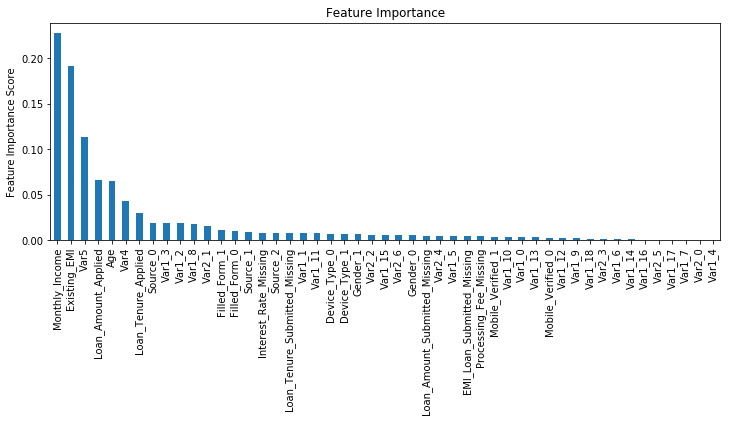

In [18]:
predictors = [x for x in train_df.columns if x not in [target, id_col]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05,
                                         n_estimators=120,
                                         max_depth=9,
                                         min_samples_split=1200,
                                         min_samples_leaf=60, 
                                         subsample=0.85,
                                         random_state=10,
                                         max_features=7)
model_fit(gbm_tuned_1, train_df, predictors,target)

### Model 3

Accuracy:  0.985371179039
AUC score:  0.899961894879
CV score: Mean- 0.840872835808  Std- 0.0102072831515  Min- 0.825537872292  Max- 0.852632806578


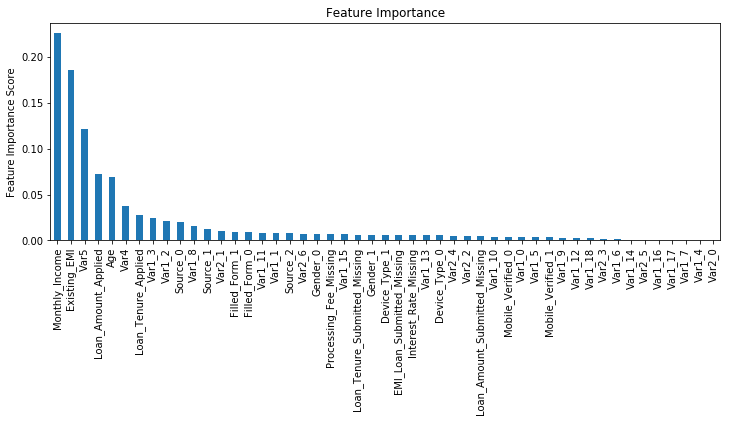

In [19]:
predictors = [x for x in train_df.columns if x not in [target, id_col]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01,
                                         n_estimators=600,
                                         max_depth=9, 
                                         min_samples_split=1200,
                                         min_samples_leaf=60, 
                                         subsample=0.85, 
                                         random_state=10,
                                         max_features=7)
model_fit(gbm_tuned_2, train_df, predictors,target)

### Model 4

Accuracy:  0.985371179039
AUC score:  0.900738275046
CV score: Mean- 0.840816144196  Std- 0.0101486549003  Min- 0.826367346939  Max- 0.852858510014


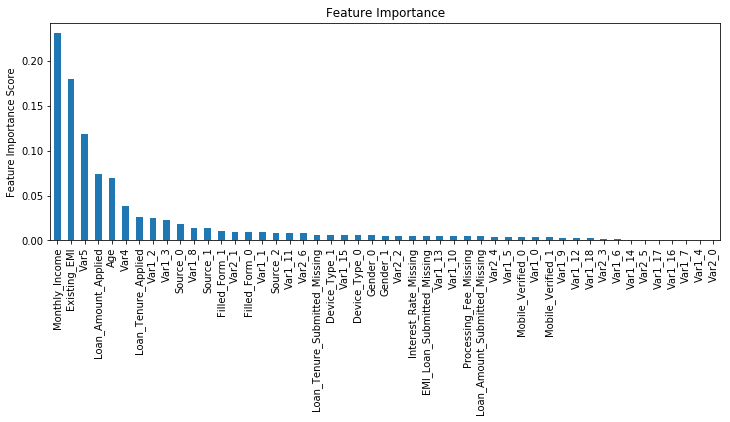

In [21]:
predictors = [x for x in train_df.columns if x not in [target, id_col]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005,
                                         n_estimators=1200,
                                         max_depth=9,
                                         min_samples_split=1200, 
                                         min_samples_leaf=60, 
                                         subsample=0.85, 
                                         random_state=10, 
                                         max_features=7,
                                         warm_start=True)
model_fit(gbm_tuned_3, train_df, predictors,target)

### Model 5

Accuracy:  0.985371179039
AUC score:  0.906448839688
CV score: Mean- 0.841107334433  Std- 0.0102822079838  Min- 0.826497456125  Max- 0.854032305091


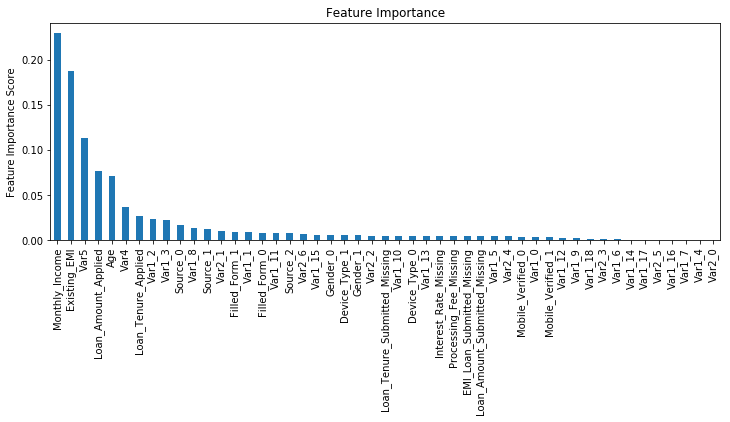

In [22]:
predictors = [x for x in train_df.columns if x not in [target, id_col]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005,
                                         n_estimators=1500,
                                         max_depth=9,
                                         min_samples_split=1200, 
                                         min_samples_leaf=60, 
                                         subsample=0.85, 
                                         random_state=10, 
                                         max_features=7,
                                         warm_start=True)
model_fit(gbm_tuned_4, train_df, predictors,target)